# Генерация текста

## Введение

Цепи Маркова можно использовать для генерации очень простого текста. Представим каждое слово в корпусе текстов как состояние. Мы можем сделать простое предположение, что следующее слово зависит только от предыдущего слова - что является основным предположением цепи Маркова.
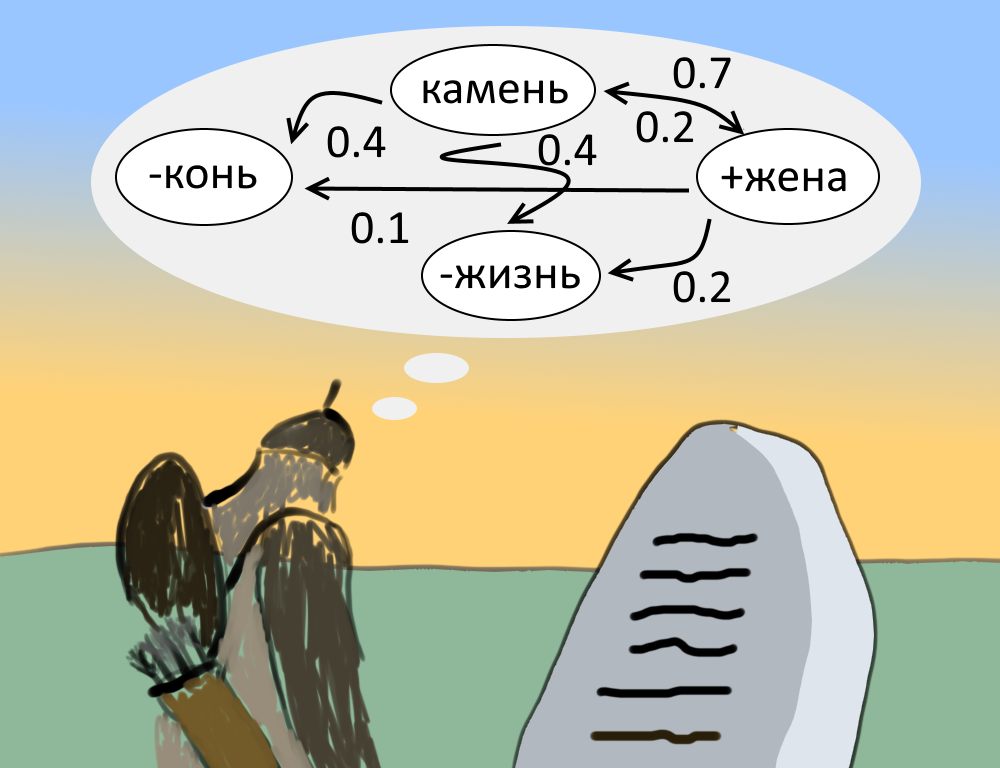
Модель, построенная на цепях Маркова, генерируют текст не так хорошо, как нейронные сети, но это хорошее (и веселое!) начало.

## Выберем текст для имитации

В этом блокноте мы специально собираемся сгенерировать текст в стиле Али Вонг, поэтому в качестве первого шага давайте извлечем текст из ее комедийного номера.

In [1]:
# Читаем текстовый корпус, включая пунктуацию
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O An...,Bo Burnham
dave,This is Dave. He tells dirty jokes for a livin...,Dave Chappelle
hasan,[theme music: orchestral hip-hop] [crowd roars...,Hasan Minhaj
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan
john,"All right, Petunia. Wish me luck out there. Yo...",John Mulaney
louis,Intro\nFade the music out. Let’s roll. Hold th...,Louis C.K.


In [2]:
# Извлечем только текст, принадлежащий Эли Вонг
ali_text = data.transcript.loc['ali']
ali_text[:200]

'Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, l'

## Построим функцию на основе цепи Маркова

Мы собираемся построить простую функцию цепи Маркова построенную на словаре:
* Ключами должны быть все слова в корпусе
* Значениями должен быть список слов, которые следуют за ключами

In [6]:
from collections import defaultdict

def markov_chain(text):
    '''Входными данными является строка текста, а выходными данными будет словарь, в котором каждое 
    слово является ключом, а каждое значение - списком слов, которые идут после ключа в тексте.'''
    
    # Выделим (токенизируем) текст по словам, включая знаки препинания
    words = text.split(' ')
    
    # Инициализируем словарь по умолчанию для хранения всех слов и следующих слов
    m_dict = defaultdict(list)
    
    # СоздаLBV сжатый список всех пар слов и поместим их в формат "слово":"список следующих слов"
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Преобразуйте базовый dict обратно в словарь
    m_dict = dict(m_dict)
    return m_dict

In [7]:
# Создайте словарь для программы Эли, оценим его
ali_dict = markov_chain(ali_text)
ali_dict

{'Ladies': ['and'],
 'and': ['gentlemen,',
  'foremost,',
  'then',
  'have',
  'there’s',
  'resentment',
  'get',
  'get',
  'says,',
  'my',
  'she',
  'snatch',
  'running',
  'fighting',
  'yelling',
  'it',
  'she',
  'I',
  'I',
  'I',
  'we',
  'watched',
  'I',
  'have',
  'that',
  'recycling,',
  'disturbing',
  'it’s',
  'all',
  'just…',
  'be',
  'half-Vietnamese.',
  'his',
  'slide.',
  'your',
  'inflamed',
  'you’re',
  'I',
  'half-Japanese',
  'I’m',
  'half-Vietnamese.',
  'playing',
  'rugby.',
  'foremost,',
  'a',
  'emotionally',
  'I',
  '20',
  'neither',
  'I',
  'I–',
  'then',
  'it’s',
  'find',
  'start',
  'just',
  'caves',
  'gets',
  'is',
  'very',
  'for',
  'I',
  'she',
  'rise',
  'be',
  'eat',
  'watch',
  'be',
  'now',
  'most',
  'in',
  'then',
  'digitally',
  'then',
  'then',
  'then',
  'steady',
  'brings',
  'let',
  'reverberate',
  'say,',
  'my',
  'he',
  'when',
  'I’m',
  'sicker,',
  'sicker.',
  'sicker,',
  'sicker,',
  'pos

## Реализация текстового генератора

Мы собираемся создать функцию, которая генерирует предложения. В качестве входных данных потребуются две вещи:
* Словарь, который вы только что создали
* Количество слов, которые вы хотите сгенерировать

Вот несколько примеров сгенерированных предложений:

>'Shape right turn– I also takes so that she’s got women all know that snail-trail.' ("Правильный ход – я тоже делаю так, чтобы все женщины знали, что это улиточный путь".)

>'Optimum level of early retirement, and be sure all the following Tuesday… because it’s too.'("Оптимальный уровень досрочного выхода на пенсию, и будьте уверены, что все в следующий вторник… потому что это слишком".)
>'Shape right turn– I also takes so that she’s got women all know that snail-trail.'

In [8]:
import random

def generate_sentence(chain, count=15):
    '''Входной словарь в формате ключ = текущее слово, значение = список следующих слов
       вместе с количеством слов, которые мы хотели бы видеть в сгенерированном предложении.'''

    # Напишем первое слово с заглавной буквы
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Сгенерируем второе слово из списка значений. Установим новое слово в качестве первого. Повторим.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # Завершите текст точкой
    sentence += '.'
    return(sentence)

In [10]:
generate_sentence(ali_dict)

'No!” They introduce you guys about our careers. Talking about our society of losers. Lots.'

## Дополнительное задание

Попробуем поработать с русским текстом

In [11]:
with open("terkin.txt", "r", encoding="utf-8") as file:
    terkin = file.read()
terkin_clean = terkin.replace("\n", " ")
terkin_clean[:200]

'Александр Твардовский Василий Теркин 1. От автора На войне, в пыли походной, В летний зной и в холода, Лучше нет простой, природной Из колодца, из пруда, Из трубы водопроводной, Из копытного следа, Из'

In [12]:
# Создайте словарь для программы Эли, оценим его
terkin_dict = markov_chain(terkin_clean)
terkin_dict

{'Александр': ['Твардовский'],
 'Твардовский': ['Василий'],
 'Василий': ['Теркин',
  'Теркин,',
  'Теркин,',
  'Иваныч…',
  'Теркин.',
  'Теркин,',
  'Теркин',
  'Теркин,',
  'Теркин,',
  'Теркин.',
  'с',
  'Теркин',
  'Теркин,',
  'Теркин,',
  'Теркин',
  'Теркин'],
 'Теркин': ['1.',
  '—',
  'на',
  '—',
  'на',
  'вкратце',
  'ранен',
  'движется',
  'крутит:',
  'дальше',
  'с',
  'тотчас',
  'встал,',
  'погребушку',
  '—',
  'никнет',
  'сник.',
  'без',
  'И',
  'дома,',
  'снова',
  'встал:',
  'щурится:',
  'И',
  'шапку',
  'Словно',
  'знал,',
  'от',
  'санки',
  'немцу',
  'сплюнул',
  'не',
  'горд.',
  'чуру',
  'немца',
  'ворот',
  'сел,',
  'В',
  '—',
  'богу',
  '—',
  'тихо',
  'дышит',
  '—',
  'рожу',
  'вздоху,',
  '—',
  'подвиг',
  'мой',
  'И',
  'смотрит',
  'тут.',
  'так',
  '—',
  'Неподобранный',
  'голос'],
 '1.': ['От'],
 'От': ['автора',
  'бомбежки',
  'родимого',
  'Ивана',
  'хлопот',
  'глухой',
  'машин',
  'кого',
  'автора',
  'любви,',
  'оск

In [15]:
generate_sentence(terkin_dict, count = 20)

'Часть, Шел наш изведал брат. Ветер злой навстречу пышет, Жизнь, как вору, Под обрывом ждут подмоги, Духом падать не столько,.'